In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [77]:
!pip install pyarrow


In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
data=pd.read_csv(r"C:\Users\Keerthana Mahathi\Downloads\archive (2)\fraudTrain.csv")
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [81]:

data.dropna(inplace=True)
data1 = pd.get_dummies(data, columns=['merchant', 'category', 'gender'])

columns_to_drop = ['trans_date_trans_time','Unnamed: 0', 'street', 'first', 'last', 'dob', 'trans_num','city','state','job']
data.drop(columns=columns_to_drop, inplace=True)

print(data.head())

             cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt gender    zip      lat      long  city_pop   unix_time  merch_lat  \
0    4.97      F  28654  36.0788  -81.1781      3495  1325376018  36.011293   
1  107.23      F  99160  48.8878 -118.2105       149  1325376044  49.159047   
2  220.11      M  83252  42.1808 -112.2620      4154  1325376051  43.150704   
3   45.00      M  59632  46.2306 -112.1138      1939  1325376076  47.034331   
4   41.96      M  24433  38.4207  -79.4629        99  1325376186  38.674999   

   merch_long  is_fraud  
0  -82.048315         0  
1 -118.186462         0  
2 

In [86]:

#columns_to_drop = ['gender','merchant','category']
#data.drop(columns=columns_to_drop, inplace=True)
print(data.head())

             cc_num     amt    zip      lat      long  city_pop   unix_time  \
0  2703186189652095    4.97  28654  36.0788  -81.1781      3495  1325376018   
1      630423337322  107.23  99160  48.8878 -118.2105       149  1325376044   
2    38859492057661  220.11  83252  42.1808 -112.2620      4154  1325376051   
3  3534093764340240   45.00  59632  46.2306 -112.1138      1939  1325376076   
4   375534208663984   41.96  24433  38.4207  -79.4629        99  1325376186   

   merch_lat  merch_long  is_fraud  
0  36.011293  -82.048315         0  
1  49.159047 -118.186462         0  
2  43.150704 -112.154481         0  
3  47.034331 -112.561071         0  
4  38.674999  -78.632459         0  


In [87]:
data.shape

(1296675, 10)

In [88]:
data.columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [89]:
data.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [90]:
data.tail()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0
1296674,4292902571056973207,4.30,59871,45.8433,-113.8748,218,1371816817,46.565983,-114.186110,0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   amt         1296675 non-null  float64
 2   zip         1296675 non-null  int64  
 3   lat         1296675 non-null  float64
 4   long        1296675 non-null  float64
 5   city_pop    1296675 non-null  int64  
 6   unix_time   1296675 non-null  int64  
 7   merch_lat   1296675 non-null  float64
 8   merch_long  1296675 non-null  float64
 9   is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 98.9 MB


In [92]:
data.isnull()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1296670,False,False,False,False,False,False,False,False,False,False
1296671,False,False,False,False,False,False,False,False,False,False
1296672,False,False,False,False,False,False,False,False,False,False
1296673,False,False,False,False,False,False,False,False,False,False


In [93]:
data.isnull().sum()

cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [94]:
data.duplicated().sum()

0

In [95]:
data.shape

(1296675, 10)

In [96]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


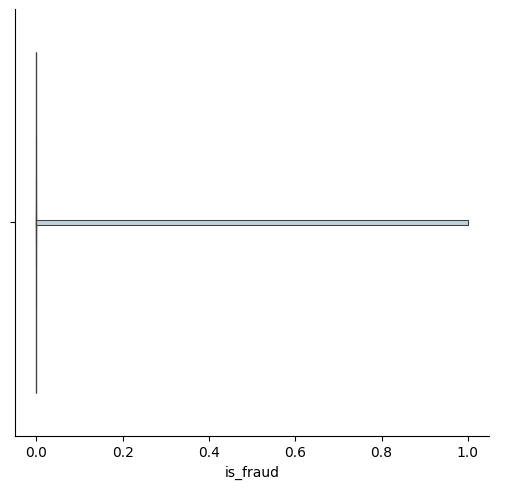

In [97]:
sns.catplot(x="is_fraud",kind="boxen",data=data)   ##box graph
plt.show()

In [98]:
y = data['is_fraud']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers

0          True
1          True
2          True
3          True
4          True
           ... 
1296670    True
1296671    True
1296672    True
1296673    True
1296674    True
Name: is_fraud, Length: 1296675, dtype: bool

In [99]:
print(removed_outliers.value_counts())

is_fraud
True     1289169
False       7506
Name: count, dtype: int64


In [100]:
for i in data.columns:
  print(i, len(data[i].value_counts().index))

cc_num 983
amt 52928
zip 970
lat 968
long 969
city_pop 879
unix_time 1274823
merch_lat 1247805
merch_long 1275745
is_fraud 2


In [101]:
UsedChip = data['zip'].value_counts()

In [102]:
UsedChip.to_frame()

,count
zip,
73754,3646
34112,3613
48088,3597
82514,3527
49628,3123
...,...
46510,7
16041,7
38915,7


In [103]:
UsedPin=data['cc_num'].value_counts()

In [104]:
UsedPin.to_frame()

,count
cc_num,
571365235126,3123
4512828414983801773,3123
36722699017270,3119
213112402583773,3117
3545109339866548,3113
...,...
180097223252063,7
4225628813173670,7
501894933032,7


In [105]:
Fraud=data['cc_num'].value_counts()
Fraud.to_frame()

,count
cc_num,
571365235126,3123
4512828414983801773,3123
36722699017270,3119
213112402583773,3117
3545109339866548,3113
...,...
180097223252063,7
4225628813173670,7
501894933032,7


In [107]:
data.nunique()

cc_num            983
amt             52928
zip               970
lat               968
long              969
city_pop          879
unix_time     1274823
merch_lat     1247805
merch_long    1275745
is_fraud            2
dtype: int64

In [108]:
fraud_c=pd.DataFrame(data["cc_num"].value_counts())
fraud_c

,count
cc_num,
571365235126,3123
4512828414983801773,3123
36722699017270,3119
213112402583773,3117
3545109339866548,3113
...,...
180097223252063,7
4225628813173670,7
501894933032,7


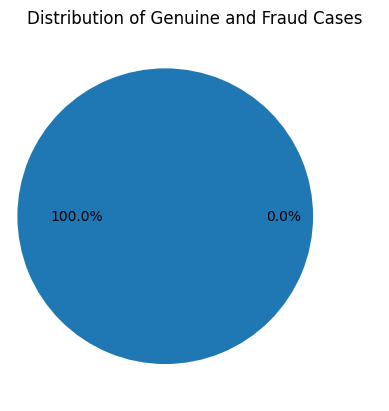

In [109]:
# Assuming 'count' is the column you want to use for the pie chart
count_value = fraud_c['count'].values[0]

# Plot the pie chart
plt.pie([count_value, 0], autopct='%.1f%%', explode=(0.2, 0))
plt.title("Distribution of Genuine and Fraud Cases")
plt.show()


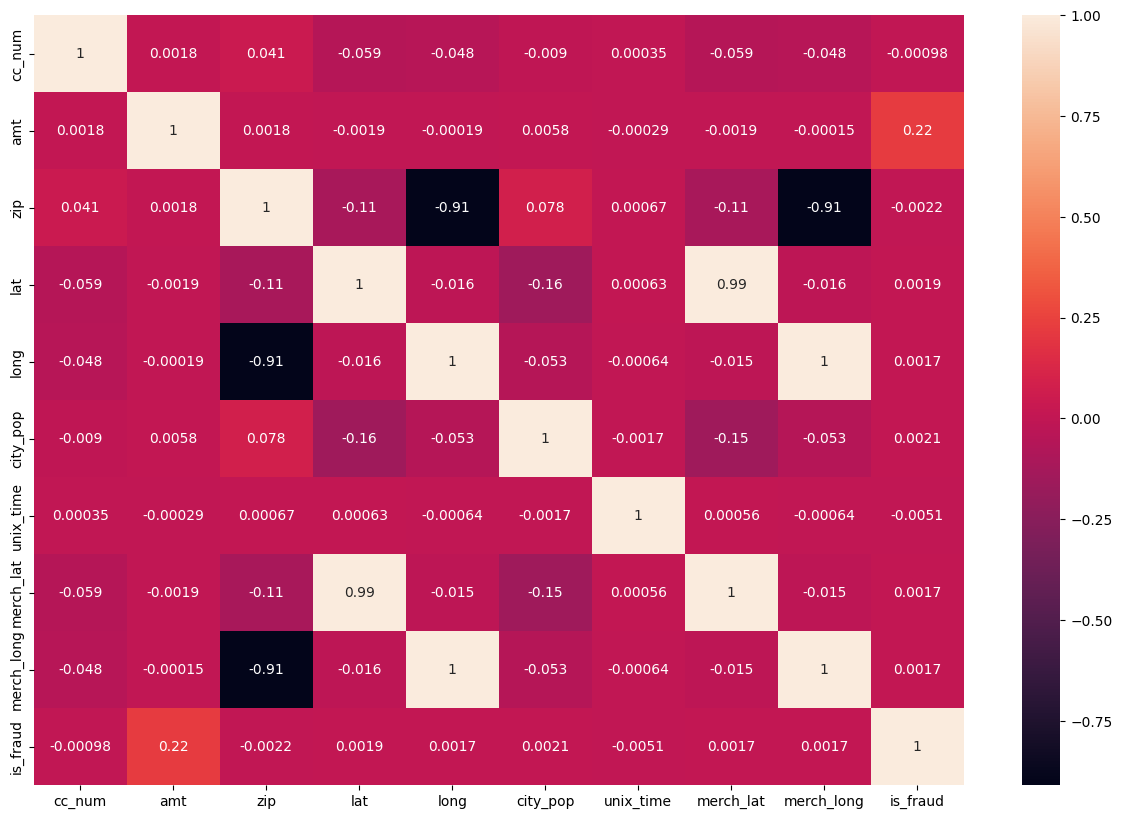

In [110]:
# Exclude non-numeric columns from correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation for numeric columns
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [111]:
X=data.drop(["is_fraud"], axis = 1)

In [112]:
Y=data["is_fraud"]

In [113]:
!pip install scikit-learn


In [114]:
# Import library
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [116]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(907672, 9)
(389003, 9)
(907672,)
(389003,)


In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [119]:
 pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [121]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [122]:
model1=LogisticRegression()

In [123]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [124]:
y_pred=model1.predict(X_test)

In [125]:
model1.score(X_train,Y_train)*100   

99.41917344591438

In [126]:
model1.score(X_test,Y_test)*100

99.42571136983518

In [130]:
from sklearn.metrics import confusion_matrix

accuracy1 = accuracy_score(Y_test, y_pred) * 100
print('\nAccuracy for Logistic Regression =', accuracy1)
print('\n\nClassification_report :-\n\n', classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix : \n')
print(confusion_matrix(Y_test, y_pred))
plt.show()



Accuracy for Logistic Regression = 99.42571136983518


Classification_report :-

               precision    recall  f1-score   support

           0       0.99      1.00      1.00    386769
           1       0.00      0.00      0.00      2234

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



Confusion_Matrix : 

[[386769      0]
 [  2234      0]]


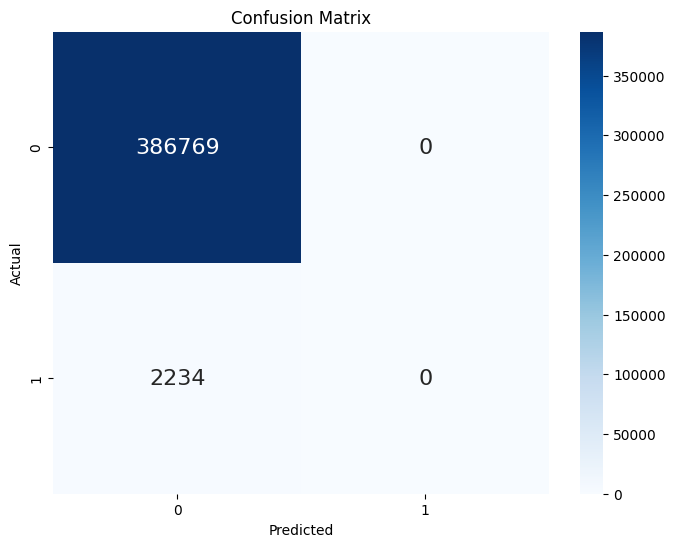

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the confusion matrix as a NumPy array
conf_matrix = np.array([[386769, 0], [2234, 0]])

# Plotting the Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
